# 🧠 UTS STKI - A11.2023.14989 - Zekki Maulana Rahman
## Soal 02 - Document Preprocessing

### 🎯 Tujuan
Menerapkan tahapan preprocessing teks pada korpus mini, meliputi:
1. Case Folding  
2. Tokenisasi  
3. Stopword Removal  
4. Stemming / Lemmatization  
5. Normalisasi angka & tanda baca  

Hasil preprocessing disimpan ke folder `data/processed/` dan akan digunakan pada model Boolean dan VSM.

In [3]:
import os
from collections import Counter
import matplotlib.pyplot as plt

BASE_DIR = os.path.dirname(os.getcwd())
processed_path = os.path.join(BASE_DIR, "data", "processed")
raw_path = os.path.join(BASE_DIR, "data", "raw")

print("Folder aktif:", processed_path)

Folder aktif: d:\JACKY\stki-uts-A11.2023.14989-Zekki Maulana Rahman\data\processed


In [4]:
# Pilih dua dokumen contoh
samples = ["doc1.txt", "doc2.txt"]

for sample in samples:
    raw_file = os.path.join(raw_path, sample)
    processed_file = os.path.join(processed_path, sample)

    with open(raw_file, "r", encoding="utf-8") as f:
        raw_text = f.read()
    with open(processed_file, "r", encoding="utf-8") as f:
        clean_text = f.read()

    print(f"=== {sample.upper()} ===")
    print("\n📄 Sebelum Preprocessing:\n", raw_text[:400], "...\n")
    print("📄 Sesudah Preprocessing:\n", clean_text[:400], "...\n")
    print("=" * 100, "\n")


=== DOC1.TXT ===

📄 Sebelum Preprocessing:
 halal kan ini?  
iya halal kok, aku tanya ke kasirnya langsung  
keju di atasnya lumer parah, enak banget 😍  
tapi sambelnya pedesnya kebangetan woi 😭  
aku suka ayamnya garing, porsinya pas buat makan siang  
sayang banget tempat duduknya sempit  
harga lumayan, tapi worth it sih  
pelayanannya agak lama pas rame  
tempatnya bersih tapi agak panas di dalam  
kalau bisa tambah kipas dong  
aku bak ...

📄 Sesudah Preprocessing:
 halal kan iya halal kok aku tanya kasir langsung keju atas lumer parah enak banget  sambelnya pedesnya banget woi  aku suka ayam garing porsi pas buat makan siang sayang banget tempat duduk sempit harga lumayan worth it sih layan lama pas rame tempat bersih panas kalau tambah kipas dong aku bakal balik sih enak dong sambelnya buat level biar pilih aku suka kremesnya gurih banget minum manis sih tu ...


=== DOC2.TXT ===

📄 Sebelum Preprocessing:
 kopinya strong bener, cocok buat pecinta kopi pahit  
aku suka banget ras

In [5]:
for sample in samples:
    processed_file = os.path.join(processed_path, sample)
    with open(processed_file, "r", encoding="utf-8") as f:
        tokens = f.read().split()

    freq = Counter(tokens)
    print(f"🔹 {sample} - 10 Token Paling Sering:")
    for word, count in freq.most_common(10):
        print(f"{word:15} : {count}")
    print("-" * 60)


🔹 doc1.txt - 10 Token Paling Sering:
aku             : 6
banget          : 4
sih             : 4
enak            : 3
buat            : 3
makan           : 3
halal           : 2
sambelnya       : 2
suka            : 2
pas             : 2
------------------------------------------------------------
🔹 doc2.txt - 10 Token Paling Sering:
banget          : 5
kopi            : 4
buat            : 4
aku             : 4
enak            : 3
suka            : 2
rasa            : 2
tempat          : 2
nongkrong       : 2
susah           : 2
------------------------------------------------------------


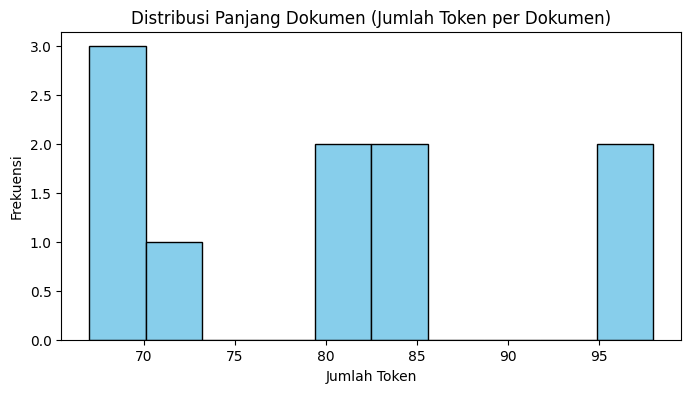

In [6]:
doc_lengths = []

for file in os.listdir(processed_path):
    if file.endswith(".txt"):
        with open(os.path.join(processed_path, file), "r", encoding="utf-8") as f:
            tokens = f.read().split()
            doc_lengths.append(len(tokens))

plt.figure(figsize=(8,4))
plt.hist(doc_lengths, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribusi Panjang Dokumen (Jumlah Token per Dokumen)")
plt.xlabel("Jumlah Token")
plt.ylabel("Frekuensi")
plt.show()


## ✅ Kesimpulan

- Proses preprocessing berhasil dilakukan untuk seluruh dokumen di folder `data/raw/`.  
- Setiap dokumen telah melalui tahapan:
  - Case folding (huruf kecil)
  - Penghapusan angka & tanda baca
  - Tokenisasi kata
  - Stopword removal
  - Stemming Bahasa Indonesia (Sastrawi)
- Hasil bersih disimpan ke `data/processed/`.

Langkah ini menjadi dasar untuk:
- Soal 3A → *Boolean Retrieval Model*
- Soal 3B → *Vector Space Model (VSM)*
